##  Library

In [28]:
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function
from gplearn.fitness import make_fitness

import matplotlib.pyplot as plt
# import graphviz
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
import pickle
import graphviz

In [29]:
# import plotly.express as px
import cufflinks as cf
cf.go_offline()

In [30]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose

In [31]:
%run ..\..\Data\triangulars.ipynb

## Functions

In [32]:
def _cos_7(x1):
    return np.cos(2*np.pi*(x1/7))
    
cos_7 = make_function(function=_cos_7,
                        name='cos_7',
                        arity=1)

def _sin_7(x1):
    return np.sin(2*np.pi*(x1/7))
    
sin_7 = make_function(function=_sin_7,
                        name='sin_7',
                        arity=1)

In [39]:
def _cos_365(x1):
    return np.cos(2*np.pi*(x1/365.25))
    
cos_365 = make_function(function=_cos_365,
                        name='cos_365',
                        arity=1)

def _sin_365(x1):
    return np.sin(2*np.pi*(x1/365.25))
    
sin_365 = make_function(function=_sin_365,
                        name='sin_365',
                        arity=1)

In [40]:
def _cos_28(x1):return np.cos(2*np.pi*(x1/28))
    
cos_28 = make_function(function=_cos_28,name='cos_28',arity=1)

def _sin_28(x1):return np.sin(2*np.pi*(x1/28))
    
sin_28 = make_function(function=_sin_28,name='sin_28',arity=1)

In [41]:
def _cos_336(x1):return np.cos(2*np.pi*(x1/336))
    
cos_336 = make_function(function=_cos_336,name='cos_336',arity=1)

def _sin_336(x1):return np.sin(2*np.pi*(x1/336))
    
sin_336 = make_function(function=_sin_336,name='sin_336',arity=1)

In [42]:
def abscos_14(x1):
    return np.abs(np.cos(2*np.pi*(x1/14)))
    
abscos_14 = make_function(function=abscos_14,
                        name='abscos_14',
                        arity=1)

def abssin_14(x1):
    return np.abs(np.sin(2*np.pi*(x1/14)))
    
abssin_14 = make_function(function=abssin_14,
                        name='abssin_14',
                        arity=1)

In [43]:
def one(x1):
    return np.ones(len(x1))

one = make_function(function = one, 
                    name = 'one', 
                    arity = 1)

In [44]:
def time(x1):
    return np.arange(1, len(x1)+1)

time = make_function(function = time,
                    name = 'time',
                    arity = 1)

## Load data

In [45]:
path_consumo = Path().resolve().parents[1] / "Data" / "Data1.xlsx"
consumo = pd.read_excel(path_consumo)
consumo = consumo.set_index("fecha").loc["2007-01-01":"2020-03-30"]

In [46]:
festivos=pd.read_excel(Path().resolve().parents[1] / "Data" /"Festivos.xlsx")
festivos2=pd.read_excel(Path().resolve().parents[1] / "Data" / "Festivos2.xlsx")

In [47]:
t = np.arange(1, consumo.size+1).reshape(-1, 1)

In [48]:
X_train, X_test, y_train1, y_test1 = train_test_split(t, consumo, test_size = 365, shuffle = False)

# scaler = MaxAbsScaler(); scaler.fit(X_train); X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

scaler1 = MaxAbsScaler(); scaler1.fit(y_train1)
y_train = scaler1.transform(y_train1).reshape(-1)
y_test = scaler1.transform(y_test1).reshape(-1)

## LinReg

In [49]:
run = LinearRegression(n_jobs = -1)

In [50]:
run.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [51]:
y_res = run.predict(X_train)
y_res_pred = run.predict(X_test)

In [52]:
y_residual = y_train - y_res
y_residual_pred = y_test - y_res_pred

In [53]:
pd.DataFrame(np.c_[y_train, y_res], index = y_train1.index, columns = ["real", "pred"]).iplot()

In [54]:
pd.DataFrame(y_residual_pred, index = y_test1.index).iplot()

## fit

In [55]:
X_train, X_test = train_test_split(t, test_size = 365, shuffle = False)

In [76]:
model = SymbolicRegressor(population_size=2000, init_method = "half and half",
                           p_crossover=0.7, p_subtree_mutation = 0.2, p_hoist_mutation = 0.05, warm_start = True,
                           function_set=('add', 'sub', 'mul', 'div', 'sin', 'cos', 'abs', cos_7,
                                         sin_7, cos_365, sin_365, cos_28, sin_28, cos_336, sin_336), 
#                            metric = 'rmse',
                           max_samples = 0.95,
                           generations=50, stopping_criteria=0.01, parsimony_coefficient=0.00001,
                           verbose=1, random_state=0)


In [77]:
model.fit(X_train, y_residual)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     9.09      6.80881e+06        3        0.0454057        0.0478189      6.42m
   1     7.42          3373.63       12         0.042576        0.0369434      6.57m
   2     6.77          33.4604        8        0.0404775        0.0406813      7.07m
   3     7.44          3382.32        8        0.0404684        0.0408548      5.96m
   4    10.69          24.1022       15        0.0385127        0.0407656      6.18m
   5    13.94          2094.97       26        0.0369334        0.0368317      6.32m
   6    17.64          3326.78       38        0.0367318        0.0406504      7.76m
   7    19.65          12.4309       24         0.036243        0.0402635      8.26m
   8    22.99          12.5861       35        0.0362305        0.0411263  

SymbolicRegressor(const_range=(-1.0, 1.0), feature_names=None,
                  function_set=('add', 'sub', 'mul', 'div', 'sin', 'cos', 'abs',
                                <gplearn.f...
                  generations=50, init_depth=(2, 6),
                  init_method='half and half', low_memory=False,
                  max_samples=0.95, metric='mean absolute error', n_jobs=1,
                  p_crossover=0.7, p_hoist_mutation=0.05, p_point_mutation=0.01,
                  p_point_replace=0.05, p_subtree_mutation=0.2,
                  parsimony_coefficient=1e-05, population_size=2000,
                  random_state=0, stopping_criteria=0.01, tournament_size=20,
                  verbose=1, warm_start=True)

In [78]:
pred_tr = model.predict(X_train)
pred_te = model.predict(X_test)
y_prediction = np.hstack([pred_tr, pred_te])

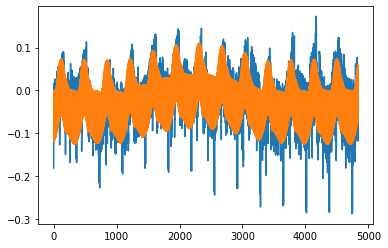

In [79]:
plt.plot(np.hstack([y_residual, y_residual_pred]))
plt.plot(y_prediction)

In [67]:
# y_new = scaler1.inverse_transform(y_prediction.reshape(-1, 1))

In [68]:
plotting = pd.DataFrame(y_new, index = consumo.index, columns = ["predict"])
plotting["real"] = consumo.to_numpy()

In [69]:
plotting.iplot()